# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [12]:
import pandas as pd

df = pd.read_csv('data/tennis.csv')

In [13]:
federer_points = df['player1 total points won'].mean()
opponent_points = df['player2 total points won'].mean()

print("Federer scores " + str(federer_points) + " points on average, while his opponents score " + str(opponent_points))

Federer scores 86.86952288218112 points on average, while his opponents score 73.91723466407011


# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [15]:
df = pd.read_csv('data/college.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [18]:
#2.1) Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in scipy.stats). For each explain if it is or not normally distributed

#using info from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
from scipy import stats

alpha = 1e-3 #taken from the link above
for column in df.columns[2:]:
    k2, p = stats.normaltest(df[column])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis cannot be rejected


Therefore it can be seen that Grad Rate is the only column that is normally distributed

2.2) Of the columns that aren't normally distributed, name which distribution could possibly fit them?

The grad rate column is a continuous variable and so it can be normally distributed. Since the other columns are discrete variables, a Poisson distribution can possibly fit them

In [20]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


2.3) Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

Looking at the table above:

    - Apps, Accept: 0.943451
    - Accept, Enroll: 0.911637
    - Enroll, F.Undergrad: 0.964640

2.4) Give 3 column pairs that are not correlated? Give their correlation coefficients.

    - Books, Grad Rate: 0.001061
    - Expend, F.Undergrad: 0.018652
    - PhD, Personal: -0.010936

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

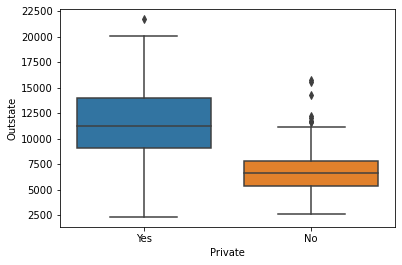

In [22]:
import seaborn as sns

sns.boxplot(x='Private', y='Outstate', data=df)

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [26]:
df = pd.read_csv('data/auto.csv', delim_whitespace=True)
df = df.drop(df.index[0]) #remove first row that has NaNs only

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.00,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.00,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.00,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.00,2625.0,18.6,82.0,1.0,ford ranger


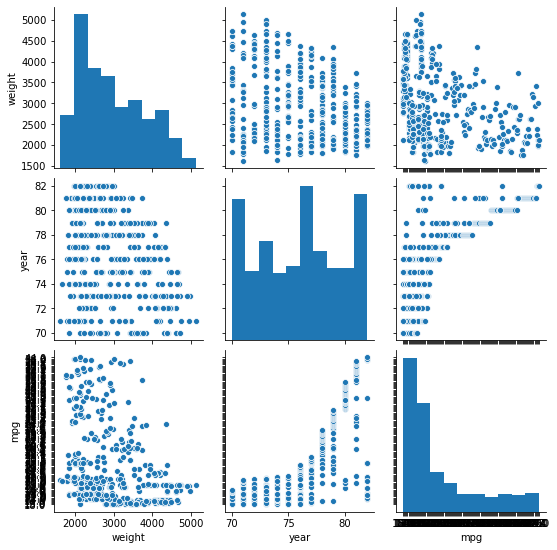

In [28]:
sns.pairplot(df[['horsepower', 'weight', 'year', 'mpg']])

As time passes, the weight of cars is decreasing while the mpg is increasing, which indicates an increase in fuel efficiency over time

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [39]:
df.describe()
#Median is the 50th percentile row

,cylinders,displacement,weight,acceleration,year,origin
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,5.178138,174.603239,2832.433198,15.868826,78.210526,1.643725
std,1.574907,91.247923,719.130507,2.720645,2.762299,0.837747
min,3.000000,70.000000,1755.000000,8.500000,70.000000,1.000000
25%,4.000000,98.000000,2189.000000,14.300000,76.000000,1.000000
50%,4.000000,140.000000,2720.000000,15.800000,78.000000,1.000000
75%,6.000000,231.500000,3410.000000,17.450000,80.000000,2.000000
max,8.000000,455.000000,4425.000000,24.800000,82.000000,3.000000


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [31]:
df = df.drop(df.index[10:85])
df.describe()

,cylinders,displacement,weight,acceleration,year,origin
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,5.178138,174.603239,2832.433198,15.868826,78.210526,1.643725
std,1.574907,91.247923,719.130507,2.720645,2.762299,0.837747
min,3.000000,70.000000,1755.000000,8.500000,70.000000,1.000000
25%,4.000000,98.000000,2189.000000,14.300000,76.000000,1.000000
50%,4.000000,140.000000,2720.000000,15.800000,78.000000,1.000000
75%,6.000000,231.500000,3410.000000,17.450000,80.000000,2.000000
max,8.000000,455.000000,4425.000000,24.800000,82.000000,3.000000


There is no significant change in the date. The biggest change is in the displacement column but even then it is not very big. 

# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [38]:
from sklearn.datasets import load_boston

print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [86]:
# loading scikit-learn dataset into pandas: https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


4.1) Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features


This is a column CRIM which measures crime per capita by town. The two columns that has the highest positive correlation are RAD and TAX, while DIS has relatively high negative correlation

- Not having easy access to urban centers due to low accesibility to radial highways could lead to higher crime - cannot think of any other possiblities
- Taxes are also correlated highly with crime. This could be because higher taxed neighborhoods are being targetted for criminal activity such as burgalaries (suburbs)

- The DIS column is has relatively high negative correlation with crime and this could be because being further away from employment centers could mean less access to job opportunities

### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [44]:
high_crime = df.sort_values(by='CRIM', ascending=False)
high_crime.head(10) #Suburbs with the highest crime rates
#The first three especially the first seem to have higher crime rates than other suburbs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
413,28.6558,0.0,18.1,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
417,25.9406,0.0,18.1,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [45]:
high_tax = df.sort_values(by='TAX', ascending=False)
high_tax.head(10) #No one particular suburb has a much higher tax rate than others

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71


In [74]:
high_pt = df.sort_values(by='PTRATIO', ascending=False)
high_pt.head(10) #Values are more or less similar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19,16.2
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46,17.8
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32,13.3
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0


### 4.3 How many of the suburbs in this data set bound the Charles river?

In [49]:
#df.CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), so should sum this column

print(str(df.CHAS.sum())+ ' suburbs bound the Charles river')

35.0 suburbs bound the Charles river


## 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [52]:
df.PTRATIO.describe()
#Median is the 50th percentile so 19.05

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [63]:
df['MEDV'] = load_boston()['target']
df.MEDV.idxmin() #Suburb with the lowest MEDV

398

In [69]:
df.loc[398]

CRIM        38.3518
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.4530
AGE        100.0000
DIS          1.4896
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       30.5900
MEDV         5.0000
Name: 398, dtype: float64

### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [80]:
seven_rooms = (df.RM > 7)
eight_rooms = (df.RM > 8)
print(str(seven_rooms.sum())+ " suburbs that average more than seven rooms per dwelling and "
      + str(eight_rooms.sum())+ " suburbs that average more than eight rooms per dwelling")

64 suburbs that average more than seven rooms per dwelling and 13 suburbs that average more than eight rooms per dwelling


In [85]:
df8 = df[df.RM > 8]
df8.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


At first I was thinking these suburbs had a lot of community housing for people in risk of homelessness. Howevere, comparing the data for suburbs with 8+ dwellings on average with the rest of the data, it can be seen that these suburbs have higher status (LSTAT), lower crime, and bigger property size(ZN) and higher property value. This could mean that these suburbs are where all rich people live.